# Common aberrations analyses

In [ ]:
from optiland import analysis
from optiland.samples.objectives import CookeTriplet

lens = CookeTriplet()
lens.draw()


## Spot diagram

In [ ]:
# spot diagram
spot = analysis.SpotDiagram(lens)
spot.view()

In [ ]:
fields = lens.fields.get_field_coords()
wavelengths = lens.wavelengths.get_wavelengths()

print("Geometric Spot Radius:")

geo_spot_radius = spot.geometric_spot_radius()
for i, field in enumerate(fields):
    for j, wavelength in enumerate(wavelengths):
        print(
            f"\tField {field}, Wavelength {wavelength:.3f} µm, "
            f"Radius: {geo_spot_radius[i][j]:.5f} mm",
        )

In [ ]:
print("RMS Spot Radius:")

rms_spot_radius = spot.rms_spot_radius()
for i, field in enumerate(fields):
    for j, wavelength in enumerate(wavelengths):
        print(
            f"\tField {field}, Wavelength {wavelength:.3f} µm, "
            f"Radius: {rms_spot_radius[i][j]:.5f} mm",
        )

## Ray fans

In [ ]:
fan = analysis.RayFan(lens)
fan.view()

## Y-Ybar plot

In [ ]:
yybar = analysis.YYbar(lens)
yybar.view()

## Distortion

In [ ]:
distortion = analysis.Distortion(lens)
distortion.view()

## Grid distortion

In [ ]:
grid = analysis.GridDistortion(lens)
grid.view()

## Field Curvature

In [ ]:
field_curv = analysis.FieldCurvature(lens)
field_curv.view()

## RMS Spot Size vs Field

In [ ]:
rms_spot_vs_field = analysis.RmsSpotSizeVsField(lens)
rms_spot_vs_field.view()

## RMS Wavefront Error vs. Field

In [ ]:
rms_wavefront_error_vs_field = analysis.RmsWavefrontErrorVsField(lens)
rms_wavefront_error_vs_field.view()

## Pupil Aberration

In [ ]:
pupil_ab = analysis.PupilAberration(lens)
pupil_ab.view()

# 1st & 3rd Order Aberrations

In [ ]:
from optiland.samples.objectives import TripletTelescopeObjective

lens = TripletTelescopeObjective()
lens.draw()

In [ ]:
print("Seidel Aberrations:")
#  Seidel aberrations include
# spherical aberration, coma, astigmatism, field curvature, and distortion.
for k, seidel in enumerate(lens.aberrations.seidels()):
    print(f"\tS{k + 1}: {seidel:.3e}")

In [ ]:
print("Third-order transverse spherical aberration:")
for k, value in enumerate(lens.aberrations.TSC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("Third-order longitudinal spherical aberration:")
for k, value in enumerate(lens.aberrations.SC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("Third-order sagittal coma:")
for k, value in enumerate(lens.aberrations.CC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("Third-order tangential coma:")
for k, value in enumerate(lens.aberrations.TCC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("Third-order transverse astigmatism:")
for k, value in enumerate(lens.aberrations.TAC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("Third-order transverse Petzval sum:")
for k, value in enumerate(lens.aberrations.TPC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("Third-order longitudinal Petzval sum:")
for k, value in enumerate(lens.aberrations.PC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("Third-order distortion:")
for k, value in enumerate(lens.aberrations.DC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("First-order transverse axial color:")
for k, value in enumerate(lens.aberrations.TAchC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("First-order longitudinal axial color:")
for k, value in enumerate(lens.aberrations.LchC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

In [ ]:
print("First-order lateral color:")
for k, value in enumerate(lens.aberrations.TchC()):
    print(f"\tSurface {k + 1}: {value:.3e}")

# Chromatic Aberrations

## singlet

In [37]:
import numpy as np

from optiland import analysis, optic

In [38]:
class Singlet(optic.Optic):
    """Simple Singlet"""

    def __init__(self):
        super().__init__()

        # add surfaces
        self.add_surface(index=0, radius=np.inf, thickness=np.inf)
        self.add_surface(
            index=1,
            thickness=0.5,
            radius=32.2526,
            is_stop=True,
            material="N-SF6",
        )
        self.add_surface(index=2, thickness=19.8532, radius=-31.9756)
        self.add_surface(index=3)

        # add aperture
        self.set_aperture(aperture_type="EPD", value=3.4)

        # add field
        self.set_field_type(field_type="angle")
        self.add_field(y=0.0)

        # add wavelength
        self.add_wavelength(value=0.48613270)
        self.add_wavelength(value=0.58756180, is_primary=True)
        self.add_wavelength(value=0.65627250)

        self.update_paraxial()

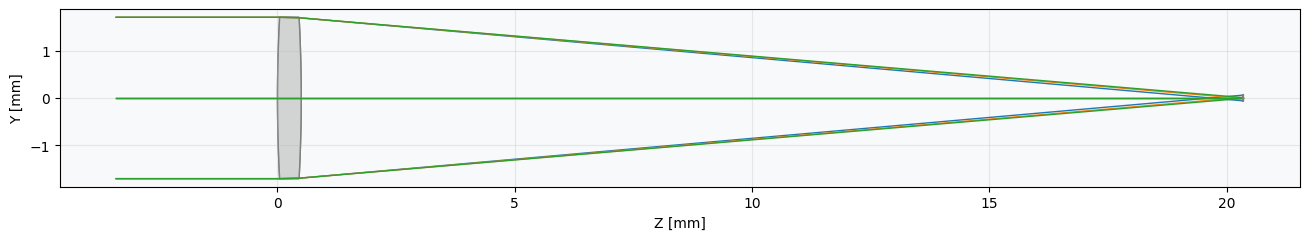

In [40]:
singlet = Singlet()
singlet.draw(
    wavelengths=[0.48613270, 0.587561806, 0.65627250],
    figsize=(16, 4),
    num_rays=3,
)

In [41]:
print(f"First-order Longitudinal Color: {np.sum(singlet.aberrations.LchC()):.3f}")

First-order Longitudinal Color: -0.789


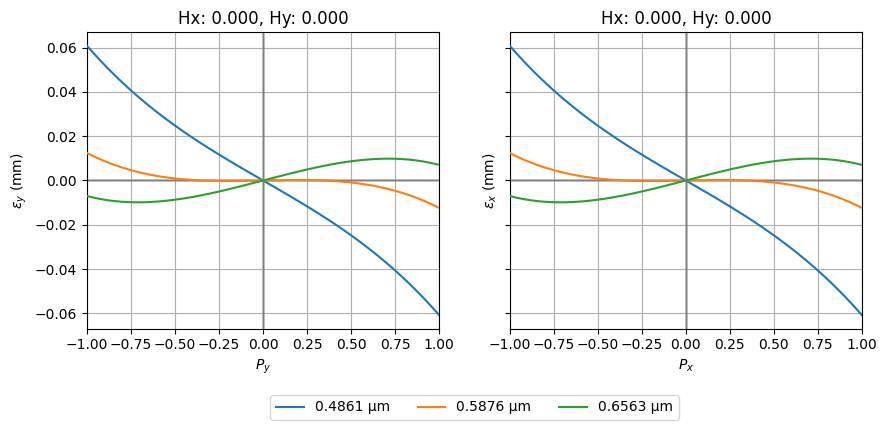

In [42]:
fan = analysis.RayFan(singlet)
fan.view()

## achromatic doublet

In [43]:
class Doublet(optic.Optic):
    """Achromatic Doublet

    Milton Laikin, Lens Design, 4th ed., CRC Press, 2007, p. 45
    """

    def __init__(self):
        super().__init__()

        # add surfaces
        self.add_surface(index=0, radius=np.inf, thickness=np.inf)
        self.add_surface(
            index=1,
            radius=12.38401,
            thickness=0.4340,
            is_stop=True,
            material="N-BAK1",
        )
        self.add_surface(
            index=2,
            radius=-7.94140,
            thickness=0.3210,
            material=("SF2", "schott"),
        )
        self.add_surface(index=3, radius=-48.44396, thickness=19.6059)
        self.add_surface(index=4)

        # add aperture
        self.set_aperture(aperture_type="EPD", value=3.4)

        # add field
        self.set_field_type(field_type="angle")
        self.add_field(y=0)

        # add wavelength
        self.add_wavelength(value=0.48613270)
        self.add_wavelength(value=0.58756180, is_primary=True)
        self.add_wavelength(value=0.65627250)

        self.update_paraxial()

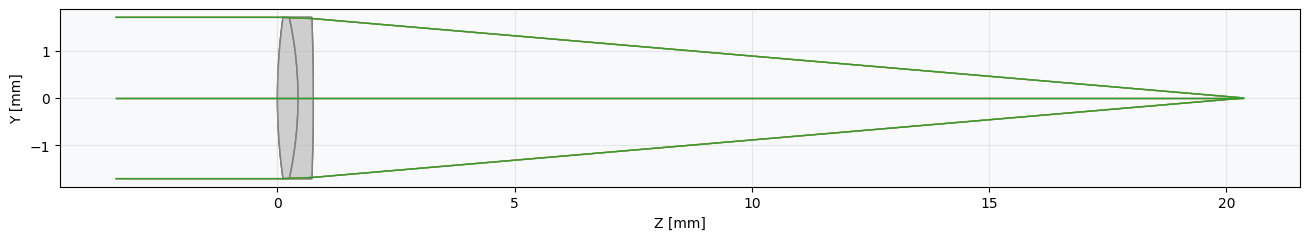

In [46]:
doublet = Doublet()
doublet.draw(
    wavelengths=[0.48613270, 0.587561806, 0.65627250],
    figsize=(16, 4),
    num_rays=3,
)

In [48]:
print(f"First-order Longitudinal Color: {np.sum(doublet.aberrations.LchC()):.3f}")

First-order Longitudinal Color: -0.015


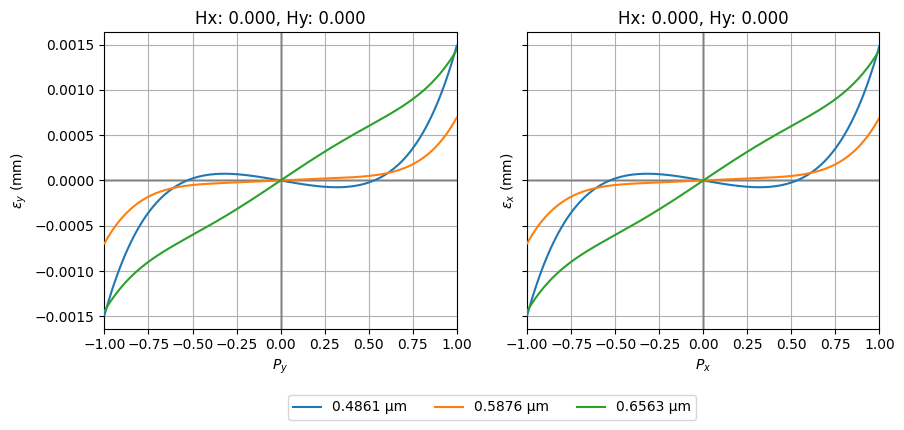

In [49]:
fan = analysis.RayFan(doublet)
fan.view()